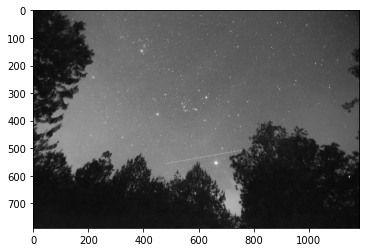

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

zapatocaImage = plt.imread('zapatocaImage.jpeg')

plt.imshow(zapatocaImage[:,:,0], cmap='gray')

In [2]:
zapatocaImage.shape

(789, 1184, 3)

In [3]:
bs1 = 0.2989 * zapatocaImage[:,:,0]
bs1 = bs1.astype(int)
bs2 = 0.5870 * zapatocaImage[:,:,1]
bs2 = bs2.astype(int)
bs3 = 0.1140 * zapatocaImage[:,:,2]
bs3 = bs3.astype(int)
blckndwht_star1 = bs1 +bs2 + bs3
#plt.imshow(bs3, cmap='gray', vmin=0, vmax=255)
#plt.imshow(bs1 +bs2 + bs3)

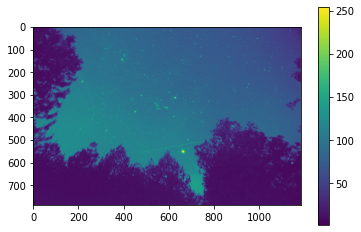

In [4]:
plt.imshow(blckndwht_star1)

#plt.imshow(blckndwht_star1, cmap='gray')
#plt.imshow(blckndwht_star1, cmap='gray', vmin=0, vmax=255)

plt.colorbar()

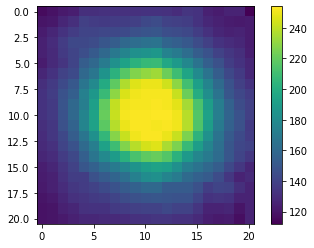

In [5]:
#plt.imshow(blckndwht_star1[543:564,648:677])
plt.imshow(blckndwht_star1[543:564,652:673])

#plt.imshow(blckndwht_star1[543:564,648:677], vmin=0, vmax=255)
plt.colorbar()

In [6]:
#x_axis = np.linspace(-14,14,29)
x_axis = np.linspace(-10,10,21)
y_axis = np.linspace(-10,10,21)

xx_axis, yy_axis = np.meshgrid(x_axis, y_axis)
xx_axis.shape

(21, 21)

In [7]:
#star1 = blckndwht_star1[543:564,648:677].copy()

star1 = blckndwht_star1[543:564,652:673].copy()
star1_nrmlzd = star1/255
#star1_nrmlzd_int = star1_nrmlzd.astype(int)

In [8]:
from scipy.optimize import leastsq
from scipy.optimize import curve_fit

In [9]:
def gauss2D_str1(X, a=255, b=0, c=1, x0=0, y0=0):
    x,y = X
    exponente = -((x-x0)**2 + (y-y0)**2) / (2*c**2)
    z = a * np.exp(exponente) + b
    #print(z)
    return z

In [10]:
#x_axis = np.linspace(-14,14,29)
#y_axis = np.linspace(-10,10,21)
#p0_star1 = 0., 5.
#print(curve_fit(gauss2D_str1, (x_axis,y_axis), z_exp_star1, p0_star1))

In [11]:
#gauss2D_str1((x_axis,y_axis),a,b,c).shape
#gauss2D_str1((x_axis,y_axis),255., 0., 5., 0.0, 0.0).shape
#gauss2D_str1((x_axis,y_axis), a=1, b=0, c=3, x0=0, y0=0) 
gauss2D_str1((x_axis,y_axis), 1, 0, 3, 0, 0).shape

(21,)

In [12]:
gauss2D_str1((x_axis,y_axis), 1, 0, 3, 0, 0)[0]

1.4945338524781451e-05

In [13]:
gauss2D_str1((x_axis,y_axis), 1, 0, 3, 0, 0)[10]

1.0

In [14]:
gauss2D_str1((x_axis,y_axis), 1, 0, 3, 0, 0)[20]

1.4945338524781451e-05

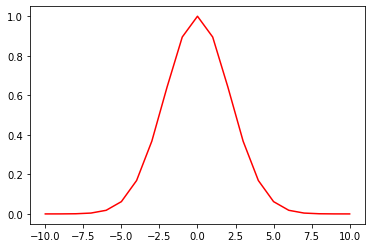

In [15]:
yprueba = gauss2D_str1((x_axis,y_axis), 1, 0, 3, 0, 0)
plt.plot(x_axis,yprueba,"r-")

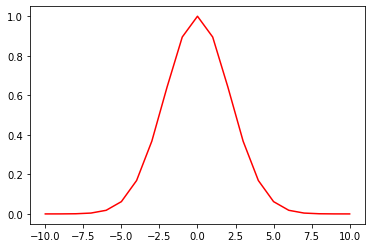

In [16]:
plt.plot(y_axis,yprueba,"r-")

In [17]:
x_exp = np.arange(0,21,1)

y_exp = np.arange(0,21,1)
x_exp

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])

In [20]:
temppx_xpp ,temppy_ypp =  (x_exp,y_exp)

In [22]:
star1_nrmlzd[temppx_xpp,temppy_ypp] == star1_nrmlzd[temppy_ypp,temppx_xpp]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [23]:
def star1_exp_func(X_exp, x_whch):
    tempx_exp ,tempy_exp = X_exp
    #star1_nrmlzd 
    tempz_exp = np.array([])
    if x_whch == 'Through_x-axis':
        tempz_exp = np.append(tempz_exp, star1_nrmlzd[tempx_exp ,tempy_exp] )
        #star1_nrmlzd[,]
        #z_exp
        return tempz_exp
    elif x_whch == 'Through_y-axis':
        tempz_exp = np.append(tempz_exp, star1_nrmlzd[tempy_exp ,tempx_exp] )
        return tempz_exp

In [24]:
z_expstar1_thrghx = star1_exp_func((x_exp ,y_exp), 'Through_x-axis')  #.shape

In [25]:
z_expstar1_thrghy = star1_exp_func((x_exp,y_exp), 'Through_y-axis')  #.shape

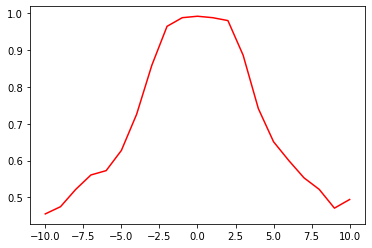

In [26]:
plt.plot(x_axis,z_expstar1_thrghx,"r-")

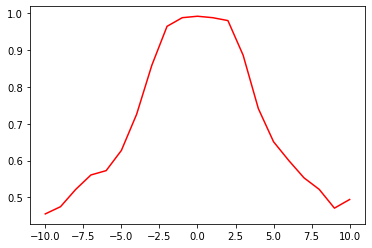

In [27]:
plt.plot(x_axis,z_expstar1_thrghy,"r-")

In [43]:
#p0_star1= np.array([255, 0, 5, 0, 0])
#     [a=255, b=0, c=5, x0=0, y0=0]
#    exponente = -((x-x0)**2 + (y-y0)**2) / (2*c**2)
#    z = a * np.exp(exponente) + b
#



p0_star1= np.array([1, 0, 3.5, 0, 0])
print(curve_fit(gauss2D_str1, (x_axis,y_axis),
                z_expstar1_thrghx,p0_star1)[0][2])

#z_expstar1_thrghY

print(curve_fit(gauss2D_str1, (x_axis,y_axis),
                z_expstar1_thrghy,p0_star1)[0][2])

4.126063711744642
4.126063711744642


/home/bullam/.local/lib/python3.7/site-packages/scipy/optimize/minpack.py:829: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [29]:
p0_star1= np.array([1, 0, 5, 0, 0])
print(curve_fit(gauss2D_str1, (x_axis,y_axis),
                z_expstar1_thrghx,p0_star1)[0][2])

print(curve_fit(gauss2D_str1, (x_axis,y_axis),
                z_expstar1_thrghy,p0_star1)[0][2])

4.928611745994732
4.928611745994732


In [34]:
#z_expstar1_thrghX

p0_star1= np.array([1, 0, 7, 0, 0])
print(curve_fit(gauss2D_str1, (x_axis,y_axis),
                z_expstar1_thrghx,p0_star1)[0][2])

#p0_star1= np.array([1, 0, 7, 0, 0])
print(curve_fit(gauss2D_str1, (x_axis,y_axis),
                z_expstar1_thrghy,p0_star1)[0][2])

4.874353706666568
4.874353706666568


In [31]:
p0_star1= np.array([1, 0, curve_fit(gauss2D_str1, (x_axis,y_axis),
                z_expstar1_thrghy,p0_star1)[0][2], 0, 0])
print(curve_fit(gauss2D_str1, (x_axis,y_axis),
                z_expstar1_thrghx,p0_star1)[0][2])

print(curve_fit(gauss2D_str1, (x_axis,y_axis),
                z_expstar1_thrghy,p0_star1)[0][2])

4.875021346933124
4.875021346933124


In [33]:
p0_star1= np.array([1, 0, 17, 0, 0])
print(curve_fit(gauss2D_str1, (x_axis,y_axis),
                z_expstar1_thrghx,p0_star1)[0][2])

print(curve_fit(gauss2D_str1, (x_axis,y_axis),
                z_expstar1_thrghy,p0_star1)[0][2])

4.87435369702605
4.87435369702605


## c es aproximadamente igual a  4.8743 

In [41]:
p0_star1= np.array([1, 0, 6, 0, 0])
print(curve_fit(gauss2D_str1, (x_axis,y_axis),
                z_expstar1_thrghx,p0_star1)[0][0])

print(curve_fit(gauss2D_str1, (x_axis,y_axis),
                z_expstar1_thrghx,p0_star1)[0][1])

print(curve_fit(gauss2D_str1, (x_axis,y_axis),
                z_expstar1_thrghx,p0_star1)[0][2])

print(curve_fit(gauss2D_str1, (x_axis,y_axis),
                z_expstar1_thrghx,p0_star1)[0][3])

print(curve_fit(gauss2D_str1, (x_axis,y_axis),
                z_expstar1_thrghx,p0_star1)[0][4])

#p0_star1= np.array([1, 0, 7, 0, 0])
#print(curve_fit(gauss2D_str1, (x_axis,y_axis),
#                z_expstar1_thrghy,p0_star1)[0][1])

0.5729727621590178
0.46791300710503303
4.874353709858581
0.9316969381425967
-0.7084043204480968


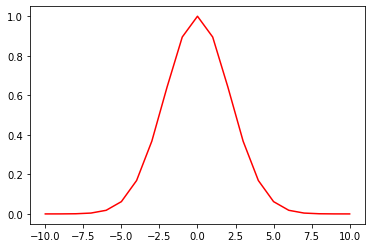

In [42]:
yprueba1 = gauss2D_str1((x_axis,y_axis), 0.5729727621590178, 0.46791300710503303, 4.874353709858581, 0.9316969381425967, -0.7084043204480968)
plt.plot(x_axis,yprueba,"r-")

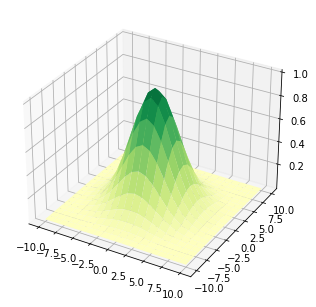

In [45]:
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D

z_model_star1 = gauss2D_str1((xx_axis,yy_axis), a=1, b=0, c=3, x0=0, y0=0)
#z_model_star1 = gauss2D_str1((x_axis,y_axis), a=1, b=0, c=3, x0=0, y0=0)
ax_star1 = Axes3D(plt.figure())
ax_star1.plot_surface(xx_axis,yy_axis,z_model_star1,vmax=abs(z_model_star1).max(), vmin=-abs(z_model_star1).max(), cmap=cm.RdYlGn, rstride=1,cstride=1)
plt.show()


#x = y = np.arange(-3.0, 3.0, 0.25) 
#X, Y = np.meshgrid(x, y)

#def f(x,y):
#    return (1-x/2+x**5+y**3)*np.exp(-x**2-y**2)

#Z1 = f(X,Y)

#ax = Axes3D(plt.figure())    # creando el cubo
#ax.plot_surface(X,Y,Z1,vmax=abs(Z1).max(), vmin=-abs(Z1).max(), cmap=cm.RdYlGn, rstride=1,cstride=1)
#plt.show()

In [46]:
z_model_star1.shape

(21, 21)

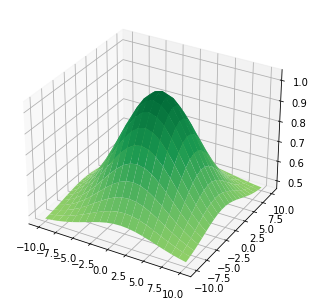

In [48]:
#z_model_star2 = gauss2D_str1((xx_axis,yy_axis), a=1, b=0, c=3, x0=0, y0=0)
z_model_star2 = gauss2D_str1((xx_axis,yy_axis),
            0.5729727621590178, 0.46791300710503303, 4.874353709858581, 0.9316969381425967, -0.7084043204480968)
#plt.plot(x_axis,yprueba,"r-")
#z_model_star1 = gauss2D_str1((x_axis,y_axis), a=1, b=0, c=3, x0=0, y0=0)
ax_star1_patentado = Axes3D(plt.figure())
ax_star1_patentado.plot_surface(xx_axis,yy_axis,z_model_star2,vmax=abs(z_model_star2).max(), vmin=-abs(z_model_star2).max(), cmap=cm.RdYlGn, rstride=1,cstride=1)
plt.show()

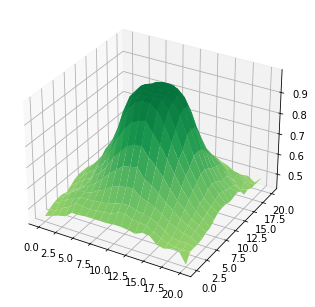

In [55]:
xx_exp, yy_exp = np.meshgrid(x_exp, y_exp)


#z_model_star2 = gauss2D_str1((xx_axis,yy_axis), a=1, b=0, c=3, x0=0, y0=0)

#star1_exp_func((x_exp ,y_exp), 'Through_x-axis')

#z_model_star1 = gauss2D_str1((x_axis,y_axis), a=1, b=0, c=3, x0=0, y0=0)
ax_star1_patentado = Axes3D(plt.figure())
ax_star1_patentado.plot_surface(xx_exp,yy_exp,star1_nrmlzd ,vmax=abs(z_model_star2).max(), vmin=-abs(z_model_star2).max(), cmap=cm.RdYlGn, rstride=1,cstride=1)
#ax_star1_patentado.plot_surface(xx_axis,yy_axis,z_exp_star3,vmax=abs(z_model_star2).max(), vmin=-abs(z_model_star2).max(), cmap=cm.RdYlGn, rstride=1,cstride=1)
plt.show()

In [1]:
ls

Image_Analysing-A.ipynb  Image_Analysing-Star1.ipynb  zapatocaImage.jpeg


In [2]:
#!jupyter nbconvert --to markdown Image_Analysing-Star1.ipynb

[NbConvertApp] Converting notebook Image_Analysing-Star1.ipynb to markdown
[NbConvertApp] Support files will be in Image_Analysing-Star1_files/
[NbConvertApp] Making directory Image_Analysing-Star1_files
[NbConvertApp] Making directory Image_Analysing-Star1_files
[NbConvertApp] Making directory Image_Analysing-Star1_files
[NbConvertApp] Making directory Image_Analysing-Star1_files
[NbConvertApp] Making directory Image_Analysing-Star1_files
[NbConvertApp] Making directory Image_Analysing-Star1_files
[NbConvertApp] Making directory Image_Analysing-Star1_files
[NbConvertApp] Making directory Image_Analysing-Star1_files
[NbConvertApp] Making directory Image_Analysing-Star1_files
[NbConvertApp] Making directory Image_Analysing-Star1_files
[NbConvertApp] Making directory Image_Analysing-Star1_files
[NbConvertApp] Writing 10084 bytes to Image_Analysing-Star1.md


In [3]:
#ls

Image_Analysing-A.ipynb       Image_Analysing-Star1.ipynb  zapatocaImage.jpeg
Image_Analysing-Star1_files/  Image_Analysing-Star1.md
